In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
pd.options.mode.chained_assignment = None 

In [8]:
raw_data = pd.read_csv('IndexE8.csv')
df_comp = raw_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [9]:
df_comp['market_value'] = df_comp.ftse
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp)*0.8)
train_df = df_comp.iloc[:size]
test_df = df_comp.iloc[size:]

In [10]:
# funtion to test LLR
def LLR_test(mod_1,mod_2,DF=1):
    
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    P = chi2.sf(LR,DF).round(3)
    
    return P

In [11]:
train_df['return_val'] = train_df.market_value.pct_change(1).mul(100)
train_df

,market_value,return_val
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
...,...,...
2013-04-01,6411.74,0.000000
2013-04-02,6490.66,1.230867
2013-04-03,6420.28,-1.084327


In [12]:
model_ret_arma_1 = ARMA(train_df.return_val[1:], order=(1,1))
result_ret_arma_1 = model_ret_arma_1.fit()
result_ret_arma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Thu, 15 Oct 2020   AIC                          15841.000
Time:                        14:48:49   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.return_val     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.return_val    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
model_ret_ar_1 = ARMA(train_df.return_val[1:], order=(1,0))
result_ret_ar_1 = model_ret_ar_1.fit()
result_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Thu, 15 Oct 2020   AIC                          15865.497
Time:                        14:51:10   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.return_val    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

In [14]:
model_ret_ma_1 = ARMA(train_df.return_val[1:], order=(0,1))
result_ret_ma_1 = model_ret_ma_1.fit()
result_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Thu, 15 Oct 2020   AIC                          15865.190
Time:                        14:51:34   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.return_val    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8550           +0.0000j           38.8550            0.0000
-----------------------------------------------------------------------------
"""

In [16]:
print(f"ARMA vs AR {LLR_test(model_ret_ar_1,model_ret_arma_1)}")
print(f"ARMA vs MA {LLR_test(model_ret_ma_1,model_ret_arma_1)}")

ARMA vs AR 0.0
ARMA vs MA 0.0


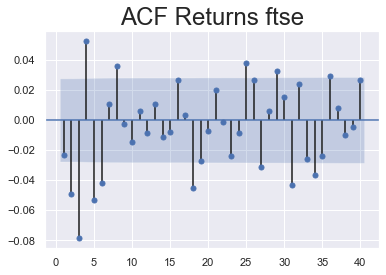

In [18]:
sgt.plot_acf(train_df.return_val[1:], zero=False, lags=40)
plt.title('ACF Returns ftse', size=24)
plt.show()

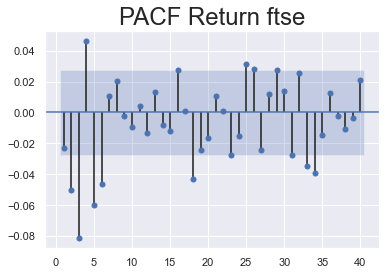

In [20]:
sgt.plot_pacf(train_df.return_val[1:], zero=False, lags=40, alpha=0.05, method=('ols'))
plt.title('PACF Return ftse', size=24)
plt.show()

In [21]:
model_ret_arma_3 = ARMA(train_df.return_val[1:], order=(3,3))
result_ret_arma_3 = model_ret_arma_3.fit()
result_ret_arma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(3, 3)   Log Likelihood               -7893.515
Method:                       css-mle   S.D. of innovations              1.166
Date:                Thu, 15 Oct 2020   AIC                          15803.030
Time:                        15:08:35   BIC                          15855.199
Sample:                    01-10-1994   HQIC                         15821.310
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.014      1.395      0.163      -0.008       0.045
ar.L1.return_val    -0.1898      0.104     -1.827      0.068      -0.393       0.014
ar.L2.return_val    -0.2942      0.087     -3.389      0.001      -0.464      -0.124
ar.L3.return_val     0.4459      0.138      3.225      0.001       0.175       0.717
ma.L1.return_val     0.1707      0.099      1.726      0.084      -0.023       0.365
ma.L2.return_val     0.2277      0.084      2.701      0.007       0.062       0.393
ma.L3.return_val    -0.5432      0.127     -4.270      0.000      -0.793      -0.294
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5168           -1.0283j            1.1508           -0.3241
AR.2           -0.5168           +1.0283j            1.1508            0.3241
AR.3            1.6932           -0.0000j            1.6932           -0.0000
MA.1           -0.5286           -0.9835j            1.1166           -0.3285
MA.2           -0.5286           +0.9835j            1.1166            0.3285
MA.3            1.4764           -0.0000j            1.4764           -0.0000
-----------------------------------------------------------------------------
"""

In [22]:
LLR_test(model_ret_arma_1,model_ret_arma_3)

0.0

In [23]:
model_ret_arma_3_2 = ARMA(train_df.return_val[1:], order=(3,2))
result_ret_arma_3_2 = model_ret_arma_3_2.fit()
result_ret_arma_3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(3, 2)   Log Likelihood               -7895.747
Method:                       css-mle   S.D. of innovations              1.166
Date:                Thu, 15 Oct 2020   AIC                          15805.495
Time:                        15:12:34   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0188      0.015      1.251      0.211      -0.011       0.048
ar.L1.return_val    -0.6785      0.087     -7.799      0.000      -0.849      -0.508
ar.L2.return_val    -0.5088      0.139     -3.670      0.000      -0.780      -0.237
ar.L3.return_val    -0.1141      0.015     -7.655      0.000      -0.143      -0.085
ma.L1.return_val     0.6568      0.087      7.536      0.000       0.486       0.828
ma.L2.return_val     0.4474      0.141      3.175      0.001       0.171       0.724
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4929           -1.5101j            1.5885           -0.3002
AR.2           -0.4929           +1.5101j            1.5885            0.3002
AR.3           -3.4748           -0.0000j            3.4748           -0.5000
MA.1           -0.7340           -1.3025j            1.4951           -0.3317
MA.2           -0.7340           +1.3025j            1.4951            0.3317
-----------------------------------------------------------------------------
"""

In [24]:
model_ret_arma_2_3 = ARMA(train_df.return_val[1:], order=(2,3))
result_ret_arma_2_3 = model_ret_arma_2_3.fit()
result_ret_arma_2_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(2, 3)   Log Likelihood               -7895.587
Method:                       css-mle   S.D. of innovations              1.166
Date:                Thu, 15 Oct 2020   AIC                          15805.174
Time:                        15:13:00   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.015      1.276      0.202      -0.010       0.048
ar.L1.return_val    -0.5605      0.090     -6.245      0.000      -0.736      -0.385
ar.L2.return_val    -0.4187      0.193     -2.172      0.030      -0.797      -0.041
ma.L1.return_val     0.5378      0.090      6.001      0.000       0.362       0.714
ma.L2.return_val     0.3540      0.195      1.818      0.069      -0.028       0.736
ma.L3.return_val    -0.1158      0.016     -7.369      0.000      -0.147      -0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6694           -1.3930j            1.5455           -0.3213
AR.2           -0.6694           +1.3930j            1.5455            0.3213
MA.1           -0.7270           -1.1772j            1.3836           -0.3381
MA.2           -0.7270           +1.1772j            1.3836            0.3381
MA.3            4.5096           -0.0000j            4.5096           -0.0000
-----------------------------------------------------------------------------
"""

In [26]:
LLR_test(model_ret_arma_2_3,model_ret_arma_3)

0.042

In [28]:
model_ret_arma_3_1 = ARMA(train_df.return_val[1:], order=(3,1))
result_ret_arma_3_1 = model_ret_arma_3_1.fit()
result_ret_arma_3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(3, 1)   Log Likelihood               -7899.072
Method:                       css-mle   S.D. of innovations              1.167
Date:                Thu, 15 Oct 2020   AIC                          15810.144
Time:                        15:18:16   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.015      1.298      0.194      -0.010       0.047
ar.L1.return_val    -0.5077      0.088     -5.769      0.000      -0.680      -0.335
ar.L2.return_val    -0.0638      0.016     -4.023      0.000      -0.095      -0.033
ar.L3.return_val    -0.1102      0.014     -7.850      0.000      -0.138      -0.083
ma.L1.return_val     0.4839      0.088      5.500      0.000       0.311       0.656
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5095           -0.0000j            1.5095           -0.5000
AR.2            0.4653           -2.4076j            2.4521           -0.2196
AR.3            0.4653           +2.4076j            2.4521            0.2196
MA.1           -2.0668           +0.0000j            2.0668            0.5000
-----------------------------------------------------------------------------
"""

In [29]:
model_ret_arma_1_3 = ARMA(train_df.return_val[1:], order=(1,3))
result_ret_arma_1_3 = model_ret_arma_1_3.fit()
result_ret_arma_1_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(1, 3)   Log Likelihood               -7896.838
Method:                       css-mle   S.D. of innovations              1.167
Date:                Thu, 15 Oct 2020   AIC                          15805.676
Time:                        15:18:47   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.014      1.332      0.183      -0.009       0.047
ar.L1.return_val    -0.4699      0.096     -4.901      0.000      -0.658      -0.282
ma.L1.return_val     0.4474      0.095      4.691      0.000       0.260       0.634
ma.L2.return_val    -0.0637      0.015     -4.113      0.000      -0.094      -0.033
ma.L3.return_val    -0.1182      0.014     -8.200      0.000      -0.146      -0.090
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1282           +0.0000j            2.1282            0.5000
MA.1           -1.4882           -1.1206j            1.8629           -0.3973
MA.2           -1.4882           +1.1206j            1.8629            0.3973
MA.3            2.4376           -0.0000j            2.4376           -0.0000
-----------------------------------------------------------------------------
"""

In [30]:
model_ret_arma_2_2 = ARMA(train_df.return_val[1:], order=(2,2))
result_ret_arma_2_2 = model_ret_arma_2_2.fit()
result_ret_arma_2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(2, 2)   Log Likelihood               -7913.223
Method:                       css-mle   S.D. of innovations              1.170
Date:                Thu, 15 Oct 2020   AIC                          15838.446
Time:                        15:19:56   BIC                          15877.573
Sample:                    01-10-1994   HQIC                         15852.156
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.014      1.394      0.163      -0.008       0.045
ar.L1.return_val     0.7820      0.238      3.284      0.001       0.315       1.249
ar.L2.return_val    -0.1563      0.177     -0.884      0.377      -0.503       0.190
ma.L1.return_val    -0.8104      0.239     -3.388      0.001      -1.279      -0.342
ma.L2.return_val     0.1177      0.187      0.628      0.530      -0.250       0.485
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5018           -0.3738j            2.5295           -0.0236
AR.2            2.5018           +0.3738j            2.5295            0.0236
MA.1            1.6107           +0.0000j            1.6107            0.0000
MA.2            5.2742           +0.0000j            5.2742            0.0000
-----------------------------------------------------------------------------
"""

In [31]:
model_ret_arma_2_1 = ARMA(train_df.return_val[1:], order=(2,1))
result_ret_arma_2_1 = model_ret_arma_2_1.fit()
result_ret_arma_2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(2, 1)   Log Likelihood               -7913.456
Method:                       css-mle   S.D. of innovations              1.171
Date:                Thu, 15 Oct 2020   AIC                          15836.913
Time:                        15:20:10   BIC                          15869.519
Sample:                    01-10-1994   HQIC                         15848.338
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.013      1.405      0.160      -0.007       0.045
ar.L1.return_val     0.6541      0.093      7.068      0.000       0.473       0.835
ar.L2.return_val    -0.0433      0.017     -2.593      0.010      -0.076      -0.011
ma.L1.return_val    -0.6829      0.092     -7.431      0.000      -0.863      -0.503
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7262           +0.0000j            1.7262            0.0000
AR.2           13.3733           +0.0000j           13.3733            0.0000
MA.1            1.4643           +0.0000j            1.4643            0.0000
-----------------------------------------------------------------------------
"""

In [32]:
model_ret_arma_1_2 = ARMA(train_df.return_val[1:], order=(1,2))
result_ret_arma_1_2 = model_ret_arma_1_2.fit()
result_ret_arma_1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(1, 2)   Log Likelihood               -7913.670
Method:                       css-mle   S.D. of innovations              1.171
Date:                Thu, 15 Oct 2020   AIC                          15837.341
Time:                        15:20:16   BIC                          15869.947
Sample:                    01-10-1994   HQIC                         15848.766
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.013      1.410      0.158      -0.007       0.045
ar.L1.return_val     0.6169      0.100      6.191      0.000       0.422       0.812
ma.L1.return_val    -0.6471      0.100     -6.496      0.000      -0.842      -0.452
ma.L2.return_val    -0.0422      0.017     -2.545      0.011      -0.075      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6210           +0.0000j            1.6210            0.0000
MA.1            1.4150           +0.0000j            1.4150            0.0000
MA.2          -16.7596           +0.0000j           16.7596            0.5000
-----------------------------------------------------------------------------
"""

In [34]:
LLR_test(model_ret_arma_3_1,model_ret_arma_3_2)

0.01

In [35]:
LLR_test(model_ret_arma_1_3,model_ret_arma_3_2) 

0.14

#### since value of MA in model 1_3 is greater than modle 3_2 (3>2) we cannot perform LLR test on models, hence we have to do manual comparison from our model results

In [39]:
print(f"\nARMA Model(3,2) LLR {result_ret_arma_3_2.llf} and  AIC {result_ret_arma_3_2.aic}")
print(f"\nARMA Model(1,3) LLR {result_ret_arma_1_3.llf}and  AIC {result_ret_arma_1_3.aic}")


ARMA Model(3,2) LLR -7895.747458514572 and  AIC 15805.494917029144

ARMA Model(1,3) LLR -7896.837893752826and  AIC 15805.675787505652


In [40]:
train_df['res_ret_arma_3_2'] = result_ret_arma_3_2.resid[1:]

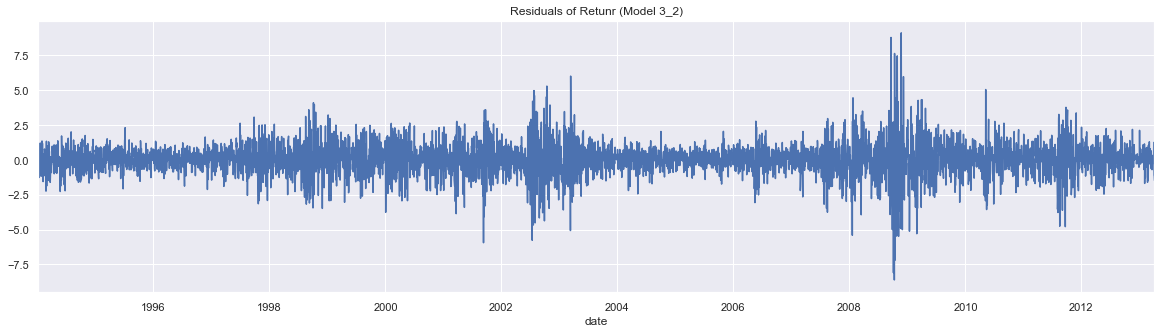

In [41]:
train_df.res_ret_arma_3_2.plot(figsize=(20,5))
plt.title("Residuals of Retunr (Model 3_2)")
plt.show()

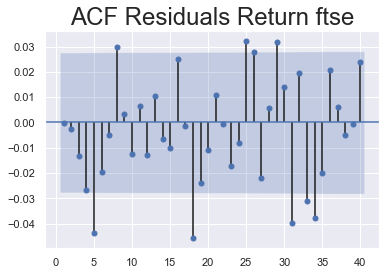

In [42]:
sgt.plot_acf(train_df.res_ret_arma_3_2[2:], zero=False, lags=40)
plt.title('ACF Residuals Return ftse', size=24)
plt.show()

In [43]:
model_ret_arma_5_5 = ARMA(train_df.return_val[1:], order=(5,5))
result_ret_arma_5_5 = model_ret_arma_5_5.fit()
result_ret_arma_5_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(5, 5)   Log Likelihood               -7882.160
Method:                       css-mle   S.D. of innovations              1.163
Date:                Thu, 15 Oct 2020   AIC                          15788.321
Time:                        16:31:05   BIC                          15866.575
Sample:                    01-10-1994   HQIC                         15815.742
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.013      1.402      0.161      -0.008       0.045
ar.L1.return_val    -0.0684      0.140     -0.490      0.624      -0.342       0.205
ar.L2.return_val    -0.6722      0.146     -4.603      0.000      -0.958      -0.386
ar.L3.return_val    -0.1152      0.141     -0.817      0.414      -0.392       0.161
ar.L4.return_val     0.1779      0.129      1.381      0.167      -0.075       0.430
ar.L5.return_val     0.1215      0.107      1.132      0.258      -0.089       0.332
ma.L1.return_val     0.0443      0.138      0.322      0.748      -0.226       0.314
ma.L2.return_val     0.6223      0.144      4.321      0.000       0.340       0.905
ma.L3.return_val     0.0107      0.136      0.079      0.937      -0.256       0.277
ma.L4.return_val    -0.1753      0.122     -1.436      0.151      -0.415       0.064
ma.L5.return_val    -0.2240      0.104     -2.148      0.032      -0.428      -0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0870           -1.0364j            1.0401           -0.2367
AR.2            0.0870           +1.0364j            1.0401            0.2367
AR.3            1.7715           -0.0000j            1.7715           -0.0000
AR.4           -1.7050           -1.1784j            2.0726           -0.4038
AR.5           -1.7050           +1.1784j            2.0726            0.4038
MA.1            0.1033           -1.0434j            1.0485           -0.2343
MA.2            0.1033           +1.0434j            1.0485            0.2343
MA.3            1.4855           -0.0000j            1.4855           -0.0000
MA.4           -1.2373           -1.0965j            1.6532           -0.3846
MA.5           -1.2373           +1.0965j            1.6532            0.3846
-----------------------------------------------------------------------------
"""

In [44]:
 model_ret_arma_5_1 = ARMA(train_df.return_val[1:], order=(5,1))
result_ret_arma_5_1 = model_ret_arma_5_1.fit()
result_ret_arma_5_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(5, 1)   Log Likelihood               -7889.311
Method:                       css-mle   S.D. of innovations              1.165
Date:                Thu, 15 Oct 2020   AIC                          15794.623
Time:                        16:32:41   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.013      1.407      0.159      -0.007       0.045
ar.L1.return_val     0.3440      0.131      2.624      0.009       0.087       0.601
ar.L2.return_val    -0.0458      0.015     -3.005      0.003      -0.076      -0.016
ar.L3.return_val    -0.0652      0.016     -4.010      0.000      -0.097      -0.033
ar.L4.return_val     0.0741      0.018      4.068      0.000       0.038       0.110
ar.L5.return_val    -0.0813      0.014     -5.688      0.000      -0.109      -0.053
ma.L1.return_val    -0.3673      0.131     -2.801      0.005      -0.624      -0.110
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6158           -0.0000j            1.6158           -0.5000
AR.2            1.3793           -0.8613j            1.6261           -0.0888
AR.3            1.3793           +0.8613j            1.6261            0.0888
AR.4           -0.1156           -1.6929j            1.6968           -0.2608
AR.5           -0.1156           +1.6929j            1.6968            0.2608
MA.1            2.7223           +0.0000j            2.7223            0.0000
-----------------------------------------------------------------------------
"""

In [45]:
model_ret_arma_1_5 = ARMA(train_df.return_val[1:], order=(1,5))
result_ret_arma_1_5 = model_ret_arma_1_5.fit()
result_ret_arma_1_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             return_val   No. Observations:                 5020
Model:                     ARMA(1, 5)   Log Likelihood               -7890.973
Method:                       css-mle   S.D. of innovations              1.165
Date:                Thu, 15 Oct 2020   AIC                          15797.947
Time:                        16:33:18   BIC                          15850.116
Sample:                    01-10-1994   HQIC                         15816.228
                         - 04-05-2013                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0189      0.013      1.419      0.156      -0.007       0.045
ar.L1.return_val     0.3285      0.152      2.159      0.031       0.030       0.627
ma.L1.return_val    -0.3534      0.152     -2.332      0.020      -0.650      -0.056
ma.L2.return_val    -0.0404      0.015     -2.624      0.009      -0.071      -0.010
ma.L3.return_val    -0.0679      0.017     -4.022      0.000      -0.101      -0.035
ma.L4.return_val     0.0742      0.020      3.771      0.000       0.036       0.113
ma.L5.return_val    -0.0683      0.015     -4.660      0.000      -0.097      -0.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.0442           +0.0000j            3.0442            0.0000
MA.1           -1.1897           -1.1548j            1.6580           -0.3774
MA.2           -1.1897           +1.1548j            1.6580            0.3774
MA.3            1.5041           -0.0000j            1.5041           -0.0000
MA.4            0.9809           -1.6056j            1.8815           -0.1627
MA.5            0.9809           +1.6056j            1.8815            0.1627
-----------------------------------------------------------------------------
"""

In [47]:
print(f"\nARMA Model(1,5) LLR {result_ret_arma_1_5.llf} and  AIC {result_ret_arma_1_5.aic}")
print(f"\nARMA Model(5,1) LLR {result_ret_arma_5_1.llf}and  AIC {result_ret_arma_5_1.aic}")


ARMA Model(1,5) LLR -7890.973460209847 and  AIC 15797.946920419694

ARMA Model(5,1) LLR -7889.3112829458205and  AIC 15794.622565891641


#### Model 5,1 has higher likelyhood compare to 1,5 hence it is the superior choice between the two

In [49]:
print(f"\nARMA Model(3,2) LLR {result_ret_arma_3_2.llf} and  AIC {result_ret_arma_3_2.aic}")
#print(f"\nARMA Model(5,1) LLR {result_ret_arma_5_1.llf}and  AIC {result_ret_arma_5_1.aic}")


ARMA Model(3,2) LLR -7895.747458514572 and  AIC 15805.494917029144


#### Model 5,1 has higher likelyhood compare to 3,2 hence it is the superior choice between the two

In [50]:
train_df['res_ret_arma_5_1'] = result_ret_arma_5_1.resid[1:]

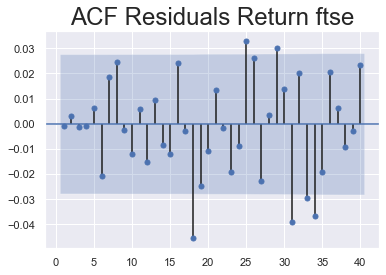

In [51]:
sgt.plot_acf(train_df.res_ret_arma_5_1[2:], zero=False, lags=40)
plt.title('ACF Residuals Return ftse', size=24)
plt.show()

### ACF for Prices

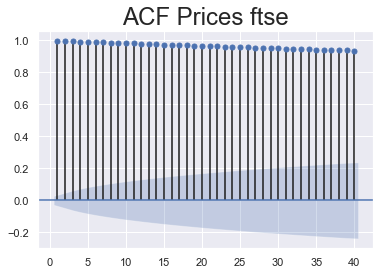

In [52]:
sgt.plot_acf(train_df.market_value, zero=False, lags=40)
plt.title('ACF Prices ftse', size=24)
plt.show()

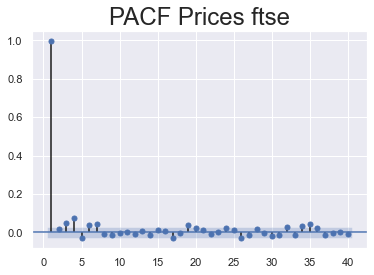

In [53]:
sgt.plot_pacf(train_df.market_value, zero=False, lags=40, alpha=0.05, method=('ols'))
plt.title('PACF Prices ftse', size=24)
plt.show()

In [56]:
model_arma_1_1 = ARMA(train_df.market_value, order=(1,1))
result_arma_1_1 = model_arma_1_1.fit()
result_arma_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 1)   Log Likelihood              -27621.789
Method:                       css-mle   S.D. of innovations             59.248
Date:                Thu, 15 Oct 2020   AIC                          55251.578
Time:                        16:52:01   BIC                          55277.663
Sample:                    01-07-1994   HQIC                         55260.718
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5087.0672    495.611     10.264      0.000    4115.687    6058.447
ar.L1.market_value     0.9985      0.001   1323.078      0.000       0.997       1.000
ma.L1.market_value    -0.0190      0.015     -1.273      0.203      -0.048       0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
MA.1           52.5545           +0.0000j           52.5545            0.0000
-----------------------------------------------------------------------------
"""

In [57]:
train_df['res_arma_1_1'] = result_arma_1_1.resid

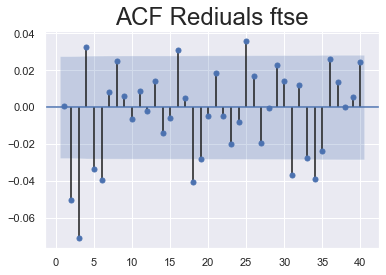

In [58]:
sgt.plot_acf(train_df.res_arma_1_1[1:], zero=False, lags=40)
plt.title('ACF Rediuals ftse', size=24)
plt.show()

In [64]:
model_arma_6_6 = ARMA(train_df.market_value, order=(6,6))
result_arma_6_6 = model_arma_6_6.fit(start_ar_lags= 11)
result_arma_6_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 6)   Log Likelihood              -27587.932
Method:                       css-mle   S.D. of innovations             58.849
Date:                Thu, 15 Oct 2020   AIC                          55203.864
Time:                        16:56:35   BIC                          55295.164
Sample:                    01-07-1994   HQIC                         55235.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6498    568.545      8.952      0.000    3975.323    6203.977
ar.L1.market_value     1.9279      0.032     60.168      0.000       1.865       1.991
ar.L2.market_value    -1.7364      0.040    -43.546      0.000      -1.815      -1.658
ar.L3.market_value     1.2681      0.034     36.927      0.000       1.201       1.335
ar.L4.market_value    -0.2377      0.159     -1.496      0.135      -0.549       0.074
ar.L5.market_value    -0.4063      0.166     -2.447      0.014      -0.732      -0.081
ar.L6.market_value     0.1840      0.049      3.778      0.000       0.089       0.279
ma.L1.market_value    -0.9490      0.035    -27.139      0.000      -1.018      -0.880
ma.L2.market_value     0.7800      0.032     24.227      0.000       0.717       0.843
ma.L3.market_value    -0.5087      0.031    -16.366      0.000      -0.570      -0.448
ma.L4.market_value    -0.1561      0.160     -0.978      0.328      -0.469       0.157
ma.L5.market_value     0.0953      0.057      1.684      0.092      -0.016       0.206
ma.L6.market_value     0.0670      0.024      2.797      0.005       0.020       0.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0857           -1.0502j            1.0537           -0.2370
AR.2            0.0857           +1.0502j            1.0537            0.2370
AR.3           -2.0258           -0.0000j            2.0258           -0.5000
AR.4            1.0011           -0.0000j            1.0011           -0.0000
AR.5            1.5306           -0.2661j            1.5536           -0.0274
AR.6            1.5306           +0.2661j            1.5536            0.0274
MA.1            0.1028           -1.0612j            1.0662           -0.2346
MA.2            0.1028           +1.0612j            1.0662            0.2346
MA.3            1.3621           -0.2792j            1.3904           -0.0322
MA.4            1.3621           +0.2792j            1.3904            0.0322
MA.5           -2.1754           -1.4338j            2.6054           -0.4073
MA.6           -2.1754           +1.4338j            2.6054            0.4073
-----------------------------------------------------------------------------
"""

In [65]:
model_arma_4_6 = ARMA(train_df.market_value, order=(4,6))
result_arma_4_6 = model_arma_4_6.fit(start_ar_lags= 11)
result_arma_4_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 6)   Log Likelihood              -27588.582
Method:                       css-mle   S.D. of innovations             58.857
Date:                Thu, 15 Oct 2020   AIC                          55201.165
Time:                        17:57:54   BIC                          55279.422
Sample:                    01-07-1994   HQIC                         55228.587
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6410    579.551      8.782      0.000    3953.741    6225.540
ar.L1.market_value     1.7884      0.082     21.773      0.000       1.627       1.949
ar.L2.market_value    -1.7828      0.093    -19.269      0.000      -1.964      -1.601
ar.L3.market_value     1.5451      0.075     20.652      0.000       1.398       1.692
ar.L4.market_value    -0.5514      0.051    -10.723      0.000      -0.652      -0.451
ma.L1.market_value    -0.8089      0.083     -9.703      0.000      -0.972      -0.646
ma.L2.market_value     0.9606      0.050     19.350      0.000       0.863       1.058
ma.L3.market_value    -0.6081      0.054    -11.322      0.000      -0.713      -0.503
ma.L4.market_value     0.0449      0.025      1.820      0.069      -0.003       0.093
ma.L5.market_value    -0.0870      0.020     -4.423      0.000      -0.126      -0.048
ma.L6.market_value     0.0520      0.017      3.078      0.002       0.019       0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0949           -1.0561j            1.0604           -0.2357
AR.2            0.0949           +1.0561j            1.0604            0.2357
AR.3            1.0010           -0.0000j            1.0010           -0.0000
AR.4            1.6112           -0.0000j            1.6112           -0.0000
MA.1            0.1160           -1.0632j            1.0695           -0.2327
MA.2            0.1160           +1.0632j            1.0695            0.2327
MA.3           -1.1767           -1.8586j            2.1997           -0.3398
MA.4           -1.1767           +1.8586j            2.1997            0.3398
MA.5            1.5431           -0.0000j            1.5431           -0.0000
MA.6            2.2504           -0.0000j            2.2504           -0.0000
-----------------------------------------------------------------------------
"""

In [69]:
model_arma_5_6 = ARMA(train_df.market_value, order=(5,6))
result_arma_5_6 = model_arma_5_6.fit(start_ar_lags= 7)
result_arma_5_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 6)   Log Likelihood              -27587.863
Method:                       css-mle   S.D. of innovations             58.849
Date:                Thu, 15 Oct 2020   AIC                          55201.726
Time:                        18:02:25   BIC                          55286.504
Sample:                    01-07-1994   HQIC                         55231.433
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6459    581.027      8.760      0.000    3950.854    6228.438
ar.L1.market_value     1.3583      0.178      7.651      0.000       1.010       1.706
ar.L2.market_value    -1.1288      0.237     -4.758      0.000      -1.594      -0.664
ar.L3.market_value     0.9146      0.229      3.998      0.000       0.466       1.363
ar.L4.market_value     0.0160      0.204      0.079      0.937      -0.383       0.415
ar.L5.market_value    -0.1613      0.119     -1.352      0.176      -0.395       0.073
ma.L1.market_value    -0.3795      0.178     -2.132      0.033      -0.728      -0.031
ma.L2.market_value     0.7293      0.125      5.828      0.000       0.484       0.975
ma.L3.market_value    -0.2197      0.153     -1.436      0.151      -0.519       0.080
ma.L4.market_value    -0.1387      0.114     -1.215      0.224      -0.362       0.085
ma.L5.market_value    -0.0879      0.017     -5.325      0.000      -0.120      -0.056
ma.L6.market_value     0.0265      0.024      1.128      0.259      -0.020       0.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0917           -1.0418j            1.0459           -0.2360
AR.2            0.0917           +1.0418j            1.0459            0.2360
AR.3            1.0010           -0.0000j            1.0010           -0.0000
AR.4            1.8982           -0.0000j            1.8982           -0.0000
AR.5           -2.9834           -0.0000j            2.9834           -0.5000
MA.1            0.1071           -1.0487j            1.0542           -0.2338
MA.2            0.1071           +1.0487j            1.0542            0.2338
MA.3           -1.5354           -1.5156j            2.1574           -0.3760
MA.4           -1.5354           +1.5156j            2.1574            0.3760
MA.5            1.5919           -0.0000j            1.5919           -0.0000
MA.6            4.5798           -0.0000j            4.5798           -0.0000
-----------------------------------------------------------------------------
"""

In [71]:
model_arma_5_6 = ARMA(train_df.market_value, order=(5,6))
result_arma_5_6 = model_arma_4_6.fit(start_ar_lags= 7)
result_arma_5_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 6)   Log Likelihood              -27588.582
Method:                       css-mle   S.D. of innovations             58.857
Date:                Thu, 15 Oct 2020   AIC                          55201.164
Time:                        18:03:39   BIC                          55279.421
Sample:                    01-07-1994   HQIC                         55228.586
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6531    578.071      8.805      0.000    3956.654    6222.652
ar.L1.market_value     1.7998      0.080     22.501      0.000       1.643       1.957
ar.L2.market_value    -1.7969      0.090    -20.012      0.000      -1.973      -1.621
ar.L3.market_value     1.5587      0.071     21.842      0.000       1.419       1.699
ar.L4.market_value    -0.5622      0.048    -11.592      0.000      -0.657      -0.467
ma.L1.market_value    -0.8204      0.081    -10.096      0.000      -0.980      -0.661
ma.L2.market_value     0.9636      0.049     19.812      0.000       0.868       1.059
ma.L3.market_value    -0.6185      0.051    -12.070      0.000      -0.719      -0.518
ma.L4.market_value     0.0458      0.025      1.857      0.063      -0.003       0.094
ma.L5.market_value    -0.0869      0.020     -4.396      0.000      -0.126      -0.048
ma.L6.market_value     0.0531      0.017      3.152      0.002       0.020       0.086
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0947           -1.0556j            1.0598           -0.2358
AR.2            0.0947           +1.0556j            1.0598            0.2358
AR.3            1.0010           -0.0000j            1.0010           -0.0000
AR.4            1.5818           -0.0000j            1.5818           -0.0000
MA.1            0.1157           -1.0626j            1.0689           -0.2327
MA.2            0.1157           +1.0626j            1.0689            0.2327
MA.3           -1.1772           -1.8585j            2.2000           -0.3399
MA.4           -1.1772           +1.8585j            2.2000            0.3399
MA.5            1.5218           -0.0000j            1.5218           -0.0000
MA.6            2.2363           -0.0000j            2.2363           -0.0000
-----------------------------------------------------------------------------
"""

In [70]:
model_arma_6_1 = ARMA(train_df.market_value, order=(6,1))
result_arma_6_1 = model_arma_6_1.fit(start_ar_lags= 7)
result_arma_6_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 1)   Log Likelihood              -27594.195
Method:                       css-mle   S.D. of innovations             58.923
Date:                Thu, 15 Oct 2020   AIC                          55206.389
Time:                        18:03:29   BIC                          55265.082
Sample:                    01-07-1994   HQIC                         55226.956
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6421    586.511      8.678      0.000    3940.101    6239.183
ar.L1.market_value     1.3921      0.058     23.933      0.000       1.278       1.506
ar.L2.market_value    -0.4369      0.059     -7.401      0.000      -0.553      -0.321
ar.L3.market_value    -0.0101      0.025     -0.409      0.683      -0.059       0.038
ar.L4.market_value     0.1126      0.025      4.527      0.000       0.064       0.161
ar.L5.market_value    -0.1158      0.025     -4.717      0.000      -0.164      -0.068
ar.L6.market_value     0.0573      0.014      4.067      0.000       0.030       0.085
ma.L1.market_value    -0.4127      0.060     -6.926      0.000      -0.529      -0.296
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2           -1.7608           -0.0000j            1.7608           -0.5000
AR.3           -0.0803           -1.8407j            1.8425           -0.2569
AR.4           -0.0803           +1.8407j            1.8425            0.2569
AR.5            1.4694           -0.8691j            1.7072           -0.0850
AR.6            1.4694           +0.8691j            1.7072            0.0850
MA.1            2.4232           +0.0000j            2.4232            0.0000
-----------------------------------------------------------------------------
"""

In [72]:
print(f"\nARMA Model(6,1) LLR {result_arma_6_1.llf} and  AIC {result_arma_6_1.aic}")
print(f"\nARMA Model(5,6) LLR {result_arma_5_6.llf}and  AIC {result_arma_5_6.aic}")


ARMA Model(6,1) LLR -27594.19457100812 and  AIC 55206.38914201624

ARMA Model(5,6) LLR -27588.58221552357and  AIC 55201.16443104714


#### AMRA(5,6) model has bigger LLR and smaller AIC hence it should be our prefered choice 

In [73]:
train_df['res_price_5_6'] = result_arma_5_6.resid[1:]

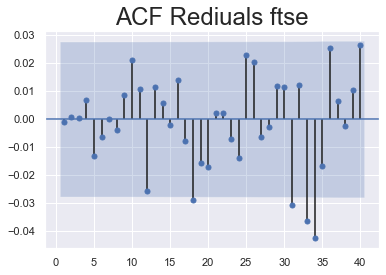

In [74]:
sgt.plot_acf(train_df.res_price_5_6[1:], zero=False, lags=40)
plt.title('ACF Rediuals ftse', size=24)
plt.show()

## ARIMAX Model

In [75]:
raw_data = pd.read_csv('IndexE8.csv')
df_comp = raw_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [76]:
df_comp['market_value'] = df_comp.ftse
del df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp)*0.8)
train_df = df_comp.iloc[:size]
test_df = df_comp.iloc[size:]